In [ ]:
라이브러리 임포트

In [1]:
from PIL import Image
from scipy import ndimage, misc, signal, fftpack

from skimage.io import imread, imshow, show
from skimage.color import rgb2gray

import matplotlib.pylab as pylab
import numpy as np
import numpy.fft as fp
import timeit

numpy fft를 사용한 주파수 도메인 가우시안 블러 

In [1]:

im = np.mean(imread('../images/lena.jpg'), axis=2)
freq = fp.fft2(im)
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 5), signal.gaussian(im.shape[1], 5))

assert(freq.shape == gauss_kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
convolved = freq * freq_kernel 							# 주파수 영역에서 곱 
im1 = fp.ifft2(convolved).real 							# 역FFT
# 주파수 스펙트럼 log 및 shift 수행
mag1 = 20*np.log10( 0.1 + fp.fftshift(freq))
mag2 = 20*np.log10( 0.1 + fp.fftshift(freq_kernel))
mag3 = 20*np.log10( 0.1 + fp.fftshift(convolved))

pylab.figure(figsize=(20,15)), pylab.gray()		# 명암도 영상으로 표시
pylab.subplot(2,3,1), pylab.imshow(im)
pylab.title('Original Image', size=20), pylab.axis('off')
pylab.subplot(2,3,2), pylab.imshow(gauss_kernel)
pylab.title('Gaussian Kernel', size=20)
pylab.subplot(2,3,3), pylab.imshow(im1) # the imaginary part is an artifact
pylab.title('Output Image', size=20), pylab.axis('off')

pylab.subplot(2,3,4), pylab.imshow(mag1.astype(int))
pylab.title('Original Image Spectrum', size=20), pylab.axis('off')
pylab.subplot(2,3,5), pylab.imshow(mag2.astype(int))
pylab.title('Gaussian Kernel Spectrum', size=20)
pylab.subplot(2,3,6), pylab.imshow(mag3.astype(int))
pylab.title('Output Image Spectrum', size=20), pylab.axis('off')
pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

NameError: name 'np' is not defined

주파수 영역에서 가우시안 커널

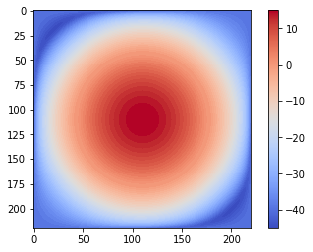

In [21]:
im = rgb2gray(imread('../images/lena.jpg'))
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 1), \
                        signal.gaussian(im.shape[1], 1))
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
mag = 20 * np.log10(0.01 + fp.fftshift(freq_kernel))    

pylab.imshow( mag.real.astype(int), cmap='coolwarm')  
pylab.colorbar()
pylab.show()

scipy signal.fftconvolve()를 사용한 주파수 도메인 가우시안 블러 필터

(224, 225)


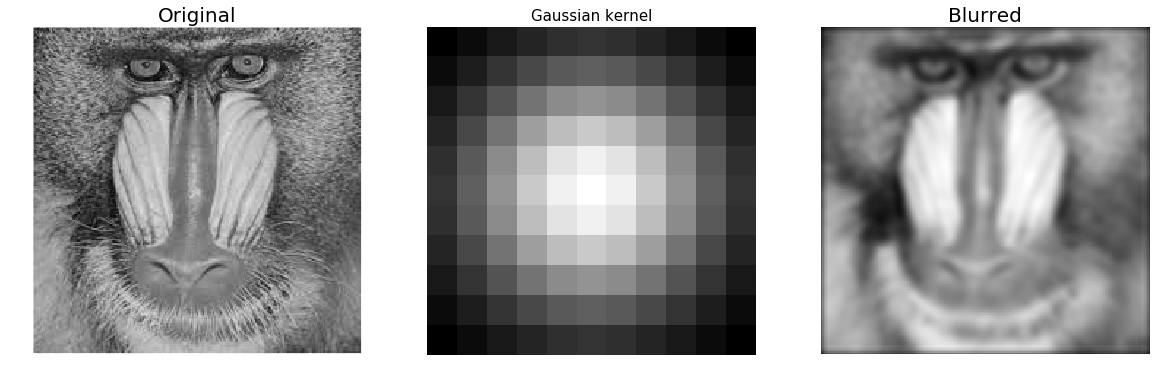

In [24]:
im = np.mean(imread('../images/mandrill.jpg'), axis=2)
print(im.shape)       # (224, 225)

gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) 
im_blurred = signal.fftconvolve(im, gauss_kernel, mode='same')

fig, (ax_original, ax_kernel, ax_blurred) = pylab.subplots(1, 3, figsize=(20,8))
ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20), ax_original.set_axis_off()
ax_kernel.imshow(gauss_kernel)
ax_kernel.set_title('Gaussian kernel', size=15), ax_kernel.set_axis_off()
ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=20), ax_blurred.set_axis_off()
fig.show()

원본 영상과 블러 영상의 주파수 스펙트럼 비교

C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


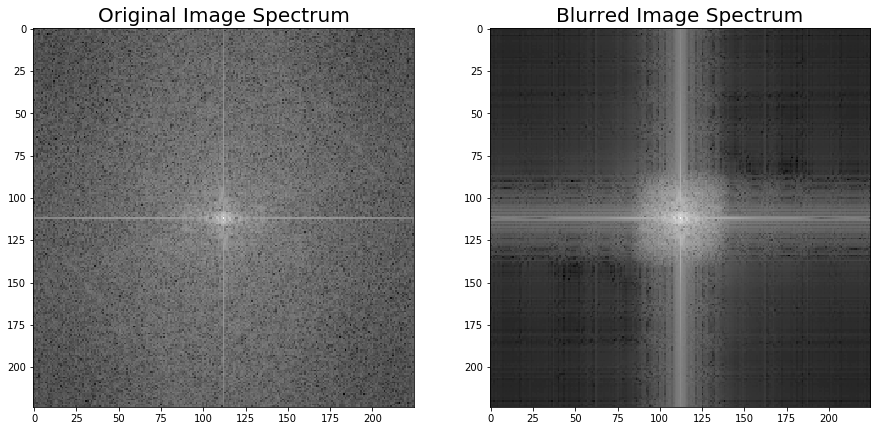

In [31]:
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift( F1 )                   # FFT 및 shift 수행
mag1 = (20*np.log10( 0.1 + F2)).astype(int)

F1 = fftpack.fft2((im_blurred).astype(float))
F2 = fftpack.fftshift( F1 )
mag2 = (20*np.log10( 0.1 + F2)).astype(int)

pylab.figure(figsize=(15,8))
pylab.subplot(1,2,1), pylab.imshow( mag1, cmap='gray')
pylab.title('Original Image Spectrum', size=20)
pylab.subplot(1,2,2), pylab.imshow( mag2, cmap='gray')
pylab.title('Blurred Image Spectrum', size=20)
pylab.show()

가우시안 블러로 SciPy convolve()와 fftconvolve()의 수행시간 비교

(224, 225)


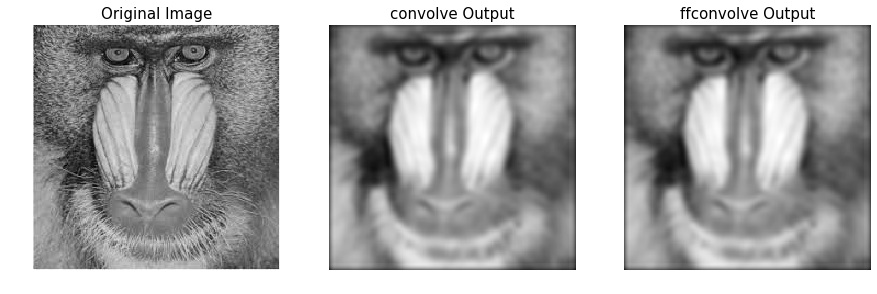

In [2]:
im = np.mean(imread('../images/mandrill.jpg'), axis=2)
print(im.shape)          # (224, 225)

gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) 
im_blurred1 = signal.convolve(im, gauss_kernel, mode="same")
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode='same')

pylab.figure(figsize=(15,5)), pylab.gray()
pylab.subplot(131), pylab.imshow(im)
pylab.title('Original Image', size=15), pylab.axis('off')
pylab.subplot(132), pylab.imshow(im_blurred1)
pylab.title('convolve Output', size=15), pylab.axis('off')
pylab.subplot(133), pylab.imshow(im_blurred2)
pylab.title('ffconvolve Output', size=15),pylab.axis('off')
pylab.show()

In [ ]:
수행시간 그래프 표시

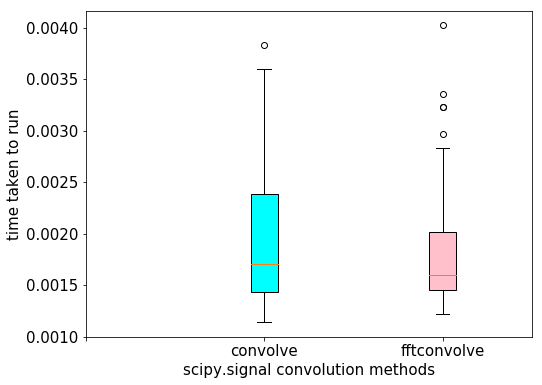

In [10]:
im = np.mean(imread('../images/mandrill.jpg'), axis=2)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) 

def wrapper_convolve(func):
    def wrapped_convolve():
        return func(im, gauss_kernel, mode="same")
    return wrapped_convolve

wrapped_convolve = wrapper_convolve(signal.convolve)
wrapped_fftconvolve = wrapper_convolve(signal.fftconvolve)
times1 = timeit.repeat(wrapped_convolve, number=1, repeat=100)
times2 = timeit.repeat(wrapped_fftconvolve, number=1, repeat=100)

data = [times1, times2]
pylab.figure(figsize=(8,6))
box = pylab.boxplot(data, patch_artist=True) #notch=True,
colors = ['cyan', 'pink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
pylab.xticks(np.arange(3), ('', 'convolve', 'fftconvolve'), size=15)
pylab.yticks(fontsize=15)
pylab.xlabel('scipy.signal convolution methods', size=15)
pylab.ylabel('time taken to run', size = 15)
pylab.show()